## Download Dataset

In [10]:
import kagglehub

path = kagglehub.dataset_download("anamikachhabra/food-items-classification-dataset-10-classes")
print("Dataset downloaded to:", path)


Dataset downloaded to: /kaggle/input/food-items-classification-dataset-10-classes


## Split Train, Validation and Test dataset

In [1]:
import os
import shutil
import random

# --------------------------------------------------------
# Source dataset path
# --------------------------------------------------------
source_dir = "/kaggle/input/food-items-classification-dataset-10-classes/food-10/images"

# --------------------------------------------------------
# Output folders
# --------------------------------------------------------
output_root = "/kaggle/working/split"
train_dir = os.path.join(output_root, "train")
val_dir   = os.path.join(output_root, "val")
test_dir  = os.path.join(output_root, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# --------------------------------------------------------
# Split ratios
# --------------------------------------------------------
train_ratio = 0.75
val_ratio   = 0.23
test_ratio  = 0.02  # remaining

# --------------------------------------------------------
# Get classes (10 folders)
# --------------------------------------------------------
classes = sorted(os.listdir(source_dir))

print("Classes found:", classes)

for class_name in classes:
    class_path = os.path.join(source_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    print(f"\nProcessing class: {class_name}")

    # Create class folders in output
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Get images list
    images = [
        f for f in os.listdir(class_path)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]

    random.shuffle(images)
    total = len(images)

    # Calculate split indices
    train_end = int(total * train_ratio)
    val_end = train_end + int(total * val_ratio)

    train_imgs = images[:train_end]
    val_imgs   = images[train_end:val_end]
    test_imgs  = images[val_end:]  # ~2%

    # Copy into respective folders
    for img in train_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
    for img in val_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))
    for img in test_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

    print(f" → Train: {len(train_imgs)} | Val: {len(val_imgs)} | Test: {len(test_imgs)}")

print("\n✔ Dataset successfully split!")
print("Train:", train_dir)
print("Val:", val_dir)
print("Test:", test_dir)


Classes found: ['beef_tartare', 'cannoli', 'ceviche', 'chocolate_mousse', 'clam_chowder', 'crab_cakes', 'dumplings', 'foie_gras', 'french_onion_soup', 'frozen_yogurt']

Processing class: beef_tartare
 → Train: 750 | Val: 230 | Test: 20

Processing class: cannoli
 → Train: 750 | Val: 230 | Test: 20

Processing class: ceviche
 → Train: 750 | Val: 230 | Test: 20

Processing class: chocolate_mousse
 → Train: 750 | Val: 230 | Test: 20

Processing class: clam_chowder
 → Train: 750 | Val: 230 | Test: 20

Processing class: crab_cakes
 → Train: 750 | Val: 230 | Test: 20

Processing class: dumplings
 → Train: 750 | Val: 230 | Test: 20

Processing class: foie_gras
 → Train: 750 | Val: 230 | Test: 20

Processing class: french_onion_soup
 → Train: 750 | Val: 230 | Test: 20

Processing class: frozen_yogurt
 → Train: 750 | Val: 230 | Test: 20

✔ Dataset successfully split!
Train: /kaggle/working/split/train
Val: /kaggle/working/split/val
Test: /kaggle/working/split/test


In [ ]:
'''import os

print(os.listdir("/kaggle/working/split"))         # should show train,val,test
print(os.listdir("/kaggle/working/split/train"))   # should show 10 class folders
'''

In [2]:
import os

train_dir = "/kaggle/working/split/train"
val_dir   = "/kaggle/working/split/val"
test_dir  = "/kaggle/working/split/test"

def count_images(folder):
    total = 0
    for subfolder in os.listdir(folder):
        path = os.path.join(folder, subfolder)
        if os.path.isdir(path):
            total += len(os.listdir(path))
    return total

print("Total Train Images:", count_images(train_dir))
print("Total Val Images:", count_images(val_dir))
print("Total Test Images:", count_images(test_dir))


Total Train Images: 7500
Total Val Images: 2300
Total Test Images: 200


In [3]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def show_random_images(folder_path, num_images=6):
    image_paths = []

    # Walk through subfolders (each class)
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(root, file))

    # Choose random images
    selected_images = random.sample(image_paths, num_images)

    # Plot images
    plt.figure(figsize=(12, 6))
    for i, img_path in enumerate(selected_images):
        img = Image.open(img_path)
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(os.path.basename(img_path))
    plt.show()


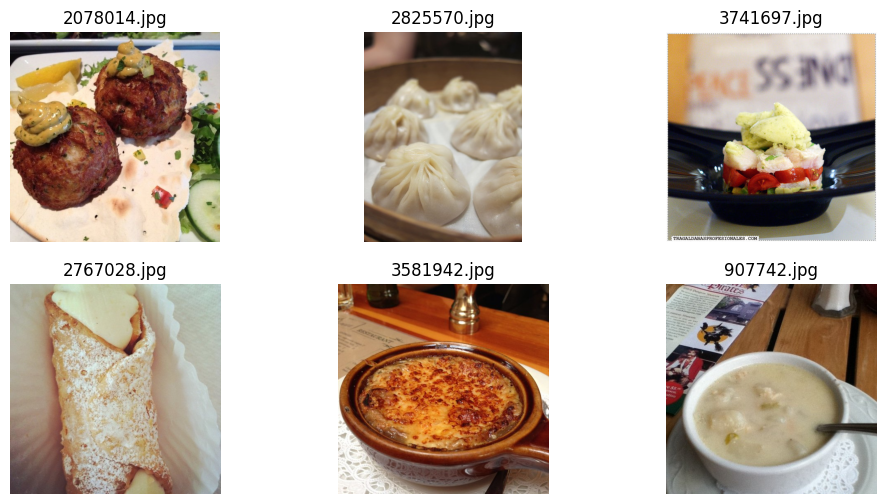

In [4]:
show_random_images("/kaggle/working/split/train", num_images=6)


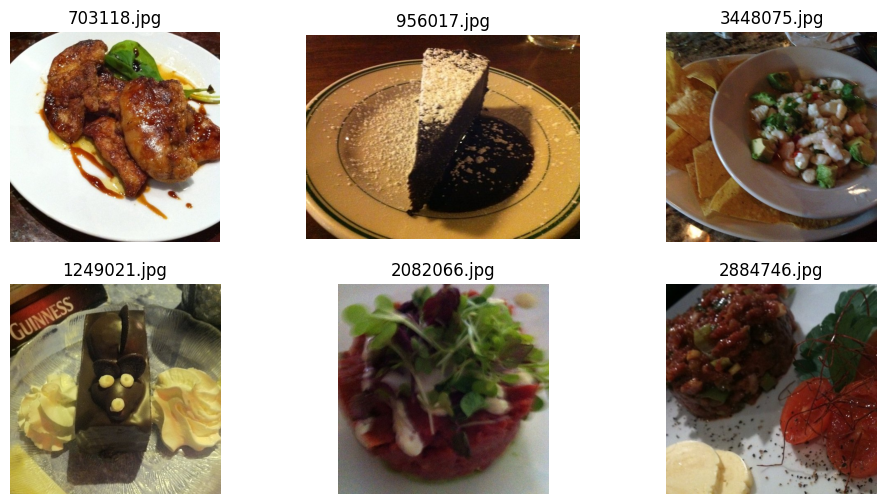

In [5]:
show_random_images("/kaggle/working/split/val", num_images=6)


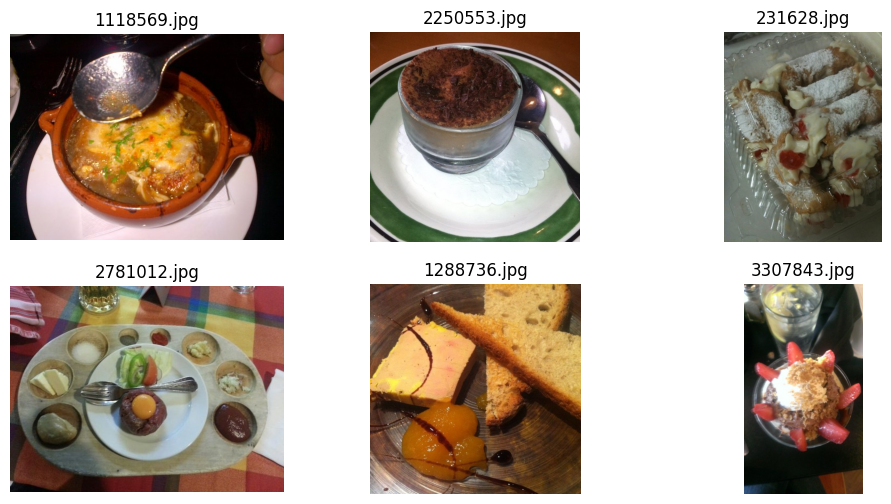

In [6]:
show_random_images("/kaggle/working/split/test", num_images=6)


In [7]:
# Normalize Pixel Values
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),  # Converts image to a tensor and normalizes to [0, 1]
])

In [8]:
import torch
import torchvision
from torchvision import transforms


In [9]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


### Data Augmentation

In [10]:
import torchvision.transforms as transforms

transform_augment = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(degrees=0, scale=(0.8, 1.2)),  # Zoom effect
    transforms.RandomAdjustSharpness(2),  # Random brightness/contrast
    transforms.ToTensor(),
])


In [11]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Directory paths
train_dir = "/kaggle/working/split/train"
val_dir   = "/kaggle/working/split/val"
test_dir  = "/kaggle/working/split/test"

# Data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.RandomRotation(20),
        transforms.RandomAffine(0, translate=(0.1, 0.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ])
}

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
val_dataset   = datasets.ImageFolder(val_dir, transform=data_transforms['val'])
test_dataset  = datasets.ImageFolder(test_dir, transform=data_transforms['test'])

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [12]:
#Adjust Data  for K-Fold CV

from sklearn.model_selection import KFold
from torch.utils.data import Subset, DataLoader
from torchvision import datasets


# === Create test DataLoader (stays fixed) ===
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)


for fold, (train_idx, _) in enumerate(kfold.split(train_dataset)):
    print(f"\n===== Fold {fold+1}/5 =====")

    # Create a subset of the training dataset for this fold
    train_subset = Subset(train_dataset, train_idx)

    # DataLoaders
    train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


===== Fold 1/5 =====

===== Fold 2/5 =====

===== Fold 3/5 =====

===== Fold 4/5 =====

===== Fold 5/5 =====


### Visualize a batch of images from a training dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch labels: tensor([7, 4, 3, 0, 8, 5, 5, 3, 8, 6])
Numeric label: 7
Class name: foie_gras


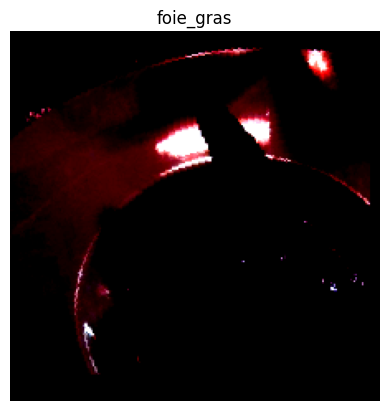

In [13]:
import matplotlib.pyplot as plt

for imgs, lbls in train_loader:
    print("Batch labels:", lbls[:10])

    # Select the first image and its label
    img = imgs[0]
    lbl = lbls[0].item()

    # Convert to HWC format for matplotlib
    img = img.permute(1, 2, 0).cpu().numpy()

    plt.imshow(img)
    plt.axis('off')

    # Print numeric label and class name
    print(f"Numeric label: {lbl}")
    print(f"Class name: {train_dataset.classes[int(lbl)]}")
    plt.title(train_dataset.classes[int(lbl)])
    plt.show()

    break


### Model Building (Classification)

### Use Transfer Learning

In [14]:

from torchvision import models
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from torchvision.models import ResNet50_Weights

# --- Model definition ---
def get_model(num_classes):
    base = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
    num_features = base.fc.in_features
    base.fc = nn.Linear(num_features, num_classes)   # <-- multiclass output
    return base

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

def train_model(model, train_loader, val_loader, epochs=85, save_path='best_model.pth'):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    best_val_acc = 0.0
    best_model_wts = None

    # Counter for condition 2
    better_val_than_train_epochs = 0  

    for epoch in range(epochs):
        model.train()
        running_loss, correct_preds, total_preds = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            correct_preds += torch.sum(preds == labels)
            total_preds += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = correct_preds.double() / total_preds

        # ---------- VALIDATION ----------
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                preds = torch.argmax(outputs, dim=1)
                val_correct += torch.sum(preds == labels)
                val_total += labels.size(0)

        val_loss /= len(val_loader)
        val_acc = val_correct.double() / val_total

        # Track metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc.item())
        val_accuracies.append(val_acc.item())

        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_wts = model.state_dict()
            torch.save(best_model_wts, save_path)
            print(f"New best model saved (Val Acc: {best_val_acc:.4f})")

        # -------- EARLY STOPPING RULE --------
        # Step 1: Count if val_acc > train_acc
        if val_acc > train_acc:
            better_val_than_train_epochs += 1
        else:
            better_val_than_train_epochs = 0  # Reset

        # Step 2: Apply stopping rule
        if (val_acc >= 0.90) and (better_val_than_train_epochs >= 2):
            print("\n🛑 Early stopping activated!")
            print("Condition met: Validation accuracy ≥ 90% AND")
            print("Validation accuracy > Training accuracy for 2 consecutive epochs.")
            break
        # -------------------------------------

        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | "
              f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    # Plot metrics
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.legend()
    plt.title('Loss over epochs')

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Acc')
    plt.plot(val_accuracies, label='Val Acc')
    plt.legend()
    plt.title('Accuracy over epochs')
    plt.show()

    print(f"Best Validation Accuracy: {best_val_acc:.4f}")
    print(f"Best model saved to: {save_path}")

    return model


Detected 10 classes


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 201MB/s] 


New best model saved (Val Acc: 0.2539)
Epoch 1/85 | Train Loss: 2.2698 | Val Loss: 2.0343 | Train Acc: 0.1787 | Val Acc: 0.2539
New best model saved (Val Acc: 0.3961)
Epoch 2/85 | Train Loss: 1.9799 | Val Loss: 1.7605 | Train Acc: 0.3020 | Val Acc: 0.3961
New best model saved (Val Acc: 0.4543)
Epoch 3/85 | Train Loss: 1.7032 | Val Loss: 1.5301 | Train Acc: 0.4113 | Val Acc: 0.4543
New best model saved (Val Acc: 0.5226)
Epoch 4/85 | Train Loss: 1.6043 | Val Loss: 1.3883 | Train Acc: 0.4432 | Val Acc: 0.5226
New best model saved (Val Acc: 0.5604)
Epoch 5/85 | Train Loss: 1.5022 | Val Loss: 1.3087 | Train Acc: 0.4790 | Val Acc: 0.5604
New best model saved (Val Acc: 0.5983)
Epoch 6/85 | Train Loss: 1.4464 | Val Loss: 1.1978 | Train Acc: 0.4972 | Val Acc: 0.5983
Epoch 7/85 | Train Loss: 1.4004 | Val Loss: 1.3399 | Train Acc: 0.5183 | Val Acc: 0.5491
Epoch 8/85 | Train Loss: 1.3772 | Val Loss: 1.1970 | Train Acc: 0.5295 | Val Acc: 0.5861
New best model saved (Val Acc: 0.6339)
Epoch 9/85 | Tr

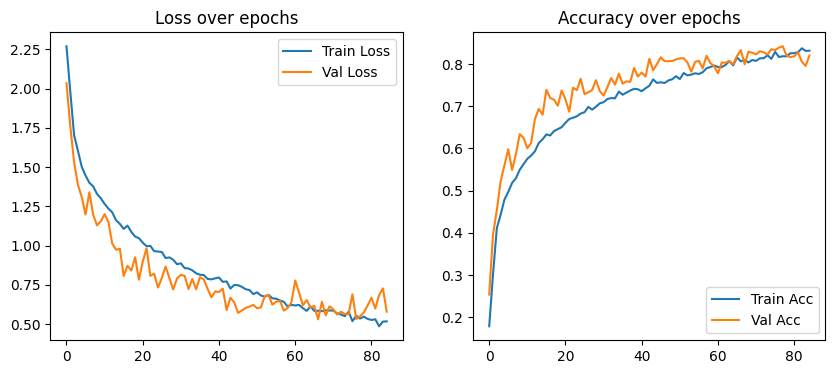

Best Validation Accuracy: 0.8422
Best model saved to: best_model.pth


In [16]:
# get number of classes from train dataset
num_classes = len(train_dataset.classes)
print(f"Detected {num_classes} classes")

# create model
model = get_model(num_classes)

# train model
trained_model = train_model(model, train_loader, val_loader, epochs=85)


### Evaluate_model

In [17]:
def evaluate_model(model, test_loader, class_names):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)   # <-- multiclass prediction

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    print("\nConfusion Matrix:")
    print(confusion_matrix(all_labels, all_preds))


In [18]:

class_names = test_loader.dataset.classes
evaluate_model(trained_model, test_loader, class_names)




Classification Report:
                   precision    recall  f1-score   support

     beef_tartare       0.65      0.75      0.70        20
          cannoli       1.00      0.80      0.89        20
          ceviche       0.69      0.90      0.78        20
 chocolate_mousse       0.67      0.80      0.73        20
     clam_chowder       0.88      0.75      0.81        20
       crab_cakes       0.80      0.60      0.69        20
        dumplings       0.83      0.95      0.88        20
        foie_gras       0.84      0.80      0.82        20
french_onion_soup       0.90      0.95      0.93        20
    frozen_yogurt       0.94      0.75      0.83        20

         accuracy                           0.81       200
        macro avg       0.82      0.81      0.81       200
     weighted avg       0.82      0.81      0.81       200


Confusion Matrix:
[[15  0  1  1  0  2  0  1  0  0]
 [ 2 16  1  1  0  0  0  0  0  0]
 [ 0  0 18  1  0  0  1  0  0  0]
 [ 0  0  1 16  0  0  2  1  0 

## Find the location of the saved model

In [19]:
import os
print(os.listdir('/kaggle/working'))


['best_model.pth', 'split', '.virtual_documents']


In [20]:
import shutil

# Path to the folder containing the images you want to download
folder_path = '/kaggle/working/split/test'  # Example path to your test folder

# Path where you want to save the zip file
zip_path = '/kaggle/working/split/test_images.zip'

# Zip the folder
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)


'/kaggle/working/split/test_images.zip'